# Ticketing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = "../data/ticket_data.xlsx"

## 1. Read ticketing data

In [3]:
%time

sheet_names = ['Sheet1', 'Sheet2', 'Sheet3']
# Read all sheets and store in a list
ticket_data = [pd.read_excel(file_path, sheet_name=sheet) for sheet in sheet_names]
# Concatenate all dataframes in the list into a single dataframe
ticket_data = pd.concat(ticket_data, ignore_index=True)


CPU times: total: 0 ns
Wall time: 0 ns


## 2. Mark weekends

In [4]:
ticket_data['Ticket Date'] = pd.to_datetime(ticket_data['Ticket Date'])
ticket_data['weekend'] = ticket_data['Ticket Date'].dt.dayofweek.isin([5, 6])

In [5]:
ticket_data

,From stop,To stop,Fare,Flag,Ticket Date,Ticket Time,weekend
0,AJMERI GATE,GANDHI NGR MOD,10,SC,2022-12-01,05:41:10,False
1,AJMERI GATE,GANDHI NGR MOD,10,SC,2022-12-01,05:41:14,False
2,TONK PHATAK,SECTOR 3,10,LDY,2022-12-01,05:41:41,False
3,TONK PHATAK,SECTOR 15,15,LDY,2022-12-01,05:41:58,False
4,AIRPORT,SECTOR 2,15,F,2022-12-01,05:43:23,False
...,...,...,...,...,...,...,...
2751238,SAYEED KA GATTA,TRANSPORT NGR,20,F,2022-12-24,18:28:02,True
2751239,SAYEED KA GATTA,NARAYAN SINGH CIRCLE,15,F,2022-12-24,18:29:40,True
2751240,SABJI MANDI,TRANSPORT NGR,15,F,2022-12-24,18:33:06,True
2751241,SABJI MANDI,TRANSPORT NGR,10,LDY,2022-12-24,18:33:38,True


In [14]:
stops = list(set(ticket_data['From stop'].unique().tolist() + ticket_data['To stop'].unique().tolist()))

In [17]:
stops

['BAGRU',
 'BAWDI',
 'DAMBI',
 'SANGANERI GATE',
 'GOLYAWAS',
 'GANDHI NAGAR MOD',
 'VKI NO. 9',
 'DWARKA PURI',
 'JHARKHAND MODE',
 'GOVT.HOSTEL',
 'NATH JI KI ',
 'MUNDIYARAMSAR',
 'VKI NO. 12',
 'RAMGARH MODE',
 'SADWA',
 'VKI NO. 17',
 'BAGARANA',
 'SANGANER DEPOT',
 'KANOTA',
 'RAILWAY PHATAK',
 'KALLAWALA',
 'KHEDI',
 'ASHAWALA',
 'MACHWA',
 'VKI NO. 14',
 'BALMUKUNDPURA',
 'SECTOR 10',
 'NEW TP NAGAR',
 'DHER KA BALAJI',
 'MAHAVEER NAGAR',
 'HARJI VIHAR',
 'VT ROAD',
 'VAISHALI NAGAR',
 'LAL MANDIR',
 'NARAIN VIHAR',
 'HASANPURA',
 'SHITALA',
 'PURANI CHUNGI',
 'ALKA CINEMA',
 'KEDIA palace',
 'RD 9 CANTEEN',
 'NRI',
 'GOPAL PURA MOD',
 'NIMEDA',
 'BHAWANI NIKETAN',
 'MALVIYA NAGAR',
 'MAHARANI COLLAGE',
 'JHOTWARA',
 'SHEKHWAT COLONY',
 'HEERA WALA',
 'RAMNIWASPURA',
 'MAJDUR NAGAR',
 'CHINKARA',
 'KHATIPURA',
 'KANTA CIRCLE',
 'SWARAN PATH',
 'HATWARA',
 'CHOTI CHOPAR',
 'HARMARA',
 'PANCH BATI',
 'SANGANER',
 'POWER HOUSE',
 'JAISINGHPURA KHOR',
 'VASUNDARA',
 'SHEKHAWAT MARG

In [19]:
import difflib
from shapely import Point
import geopandas as gpd

In [20]:
bus_stop = pd.read_excel("../data/geo_data/bus_stop/bus_stop_cleaned.xlsx")
bus_stop['geometry'] = [Point(xy) for xy in zip(bus_stop['lon'], bus_stop['lat'])]
bus_stop = gpd.GeoDataFrame(bus_stop, crs="EPSG:4326", geometry='geometry')

## 3. Identify most popular trips across all categories

In [5]:
popular_trips = ticket_data.groupby(['From stop', 'To stop']).size().reset_index(name='count').sort_values(['count'], ascending=[False]).head(10)

In [6]:
popular_trips.loc[:,'trip'] = popular_trips['From stop'] + " to " + popular_trips['To stop']

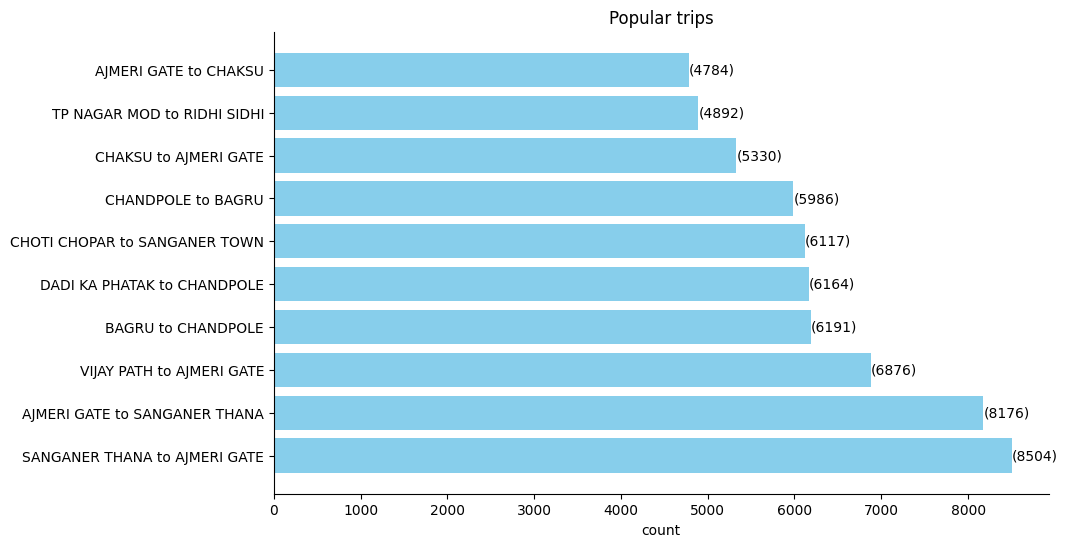

In [7]:
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(popular_trips['trip'], popular_trips['count'], color='skyblue')

for bar, count in zip(bars, popular_trips['count']):
    width = bar.get_width()
    label_x_pos = width if width > 2 else width + 1  # Adjust this value based on your data
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'({count})', va='center')

plt.xlabel('count')
plt.ylabel('')
plt.title('Popular trips')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

SANGANER THANA, AJMERI GATE, CHANDPOLE,

### 3.1 Identify most popular trips across all categories on weekdays

In [8]:
popular_trips = ticket_data[ticket_data['weekend']==False].groupby(['From stop', 'To stop']).size().reset_index(name='count').sort_values(['count'], ascending=[False]).head(10)
popular_trips.loc[:,'trip'] = popular_trips['From stop'] + " to " + popular_trips['To stop']

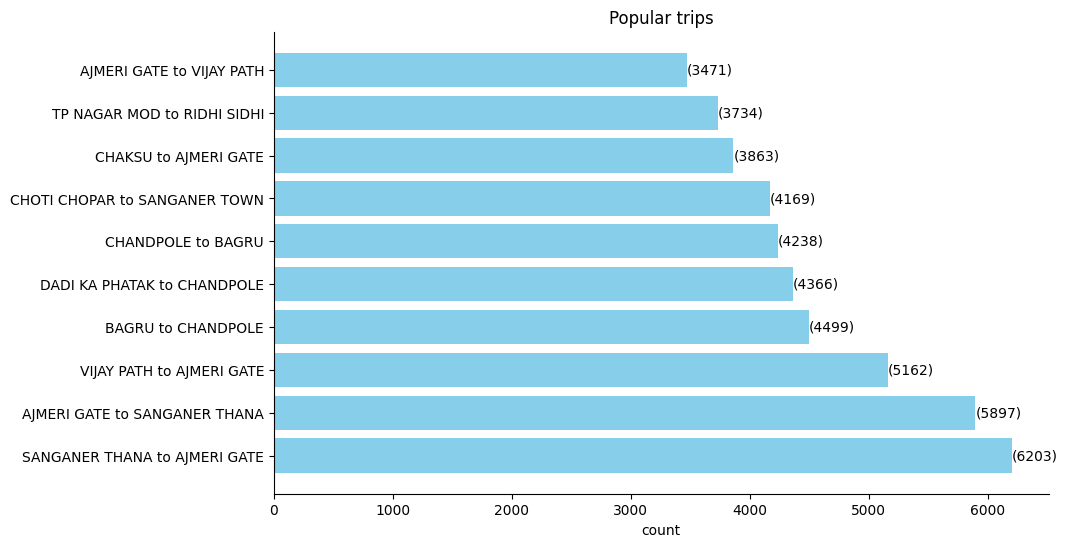

In [9]:
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(popular_trips['trip'], popular_trips['count'], color='skyblue')

for bar, count in zip(bars, popular_trips['count']):
    width = bar.get_width()
    label_x_pos = width if width > 2 else width + 1  # Adjust this value based on your data
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'({count})', va='center')

plt.xlabel('count')
plt.ylabel('')
plt.title('Popular trips')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## 3.2 Identify most popular trips across all categories on weekends

In [10]:
popular_trips = ticket_data[ticket_data['weekend']==True].groupby(['From stop', 'To stop']).size().reset_index(name='count').sort_values(['count'], ascending=[False]).head(10)
popular_trips.loc[:,'trip'] = popular_trips['From stop'] + " to " + popular_trips['To stop']

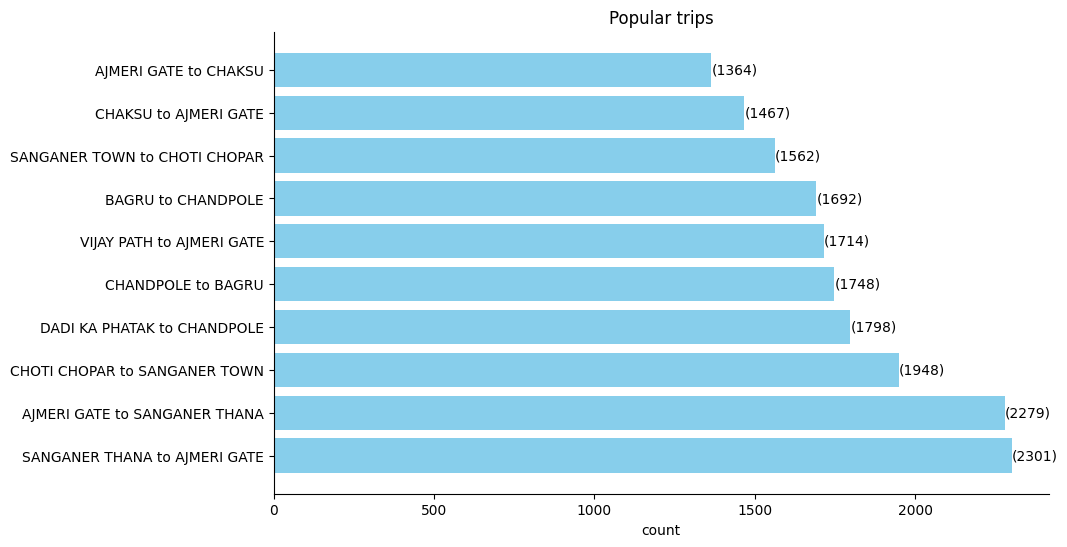

In [11]:
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(popular_trips['trip'], popular_trips['count'], color='skyblue')

for bar, count in zip(bars, popular_trips['count']):
    width = bar.get_width()
    label_x_pos = width if width > 2 else width + 1  # Adjust this value based on your data
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'({count})', va='center')

plt.xlabel('count')
plt.ylabel('')
plt.title('Popular trips')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## 4 Count number of trips for each category on weekends

In [12]:
# Group by 'Flag', 'From', and 'To', and count the number of trips
trip_counts = ticket_data.groupby(['Flag', 'From stop', 'To stop']).size().reset_index(name='count')

# Sort the results within each 'Flag'
most_popular_trips = trip_counts.sort_values(['Flag', 'count'], ascending=[True, False])

# Select the top trip for each 'Flag'
most_popular_per_flag = most_popular_trips.groupby('Flag').head(1)

In [13]:
most_popular_per_flag.loc[:,'trip'] = most_popular_per_flag['From stop'] + " to " + most_popular_per_flag['To stop']

C:\Users\P70087882\AppData\Local\Temp\ipykernel_35376\3949635609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_popular_per_flag.loc[:,'trip'] = most_popular_per_flag['From stop'] + " to " + most_popular_per_flag['To stop']


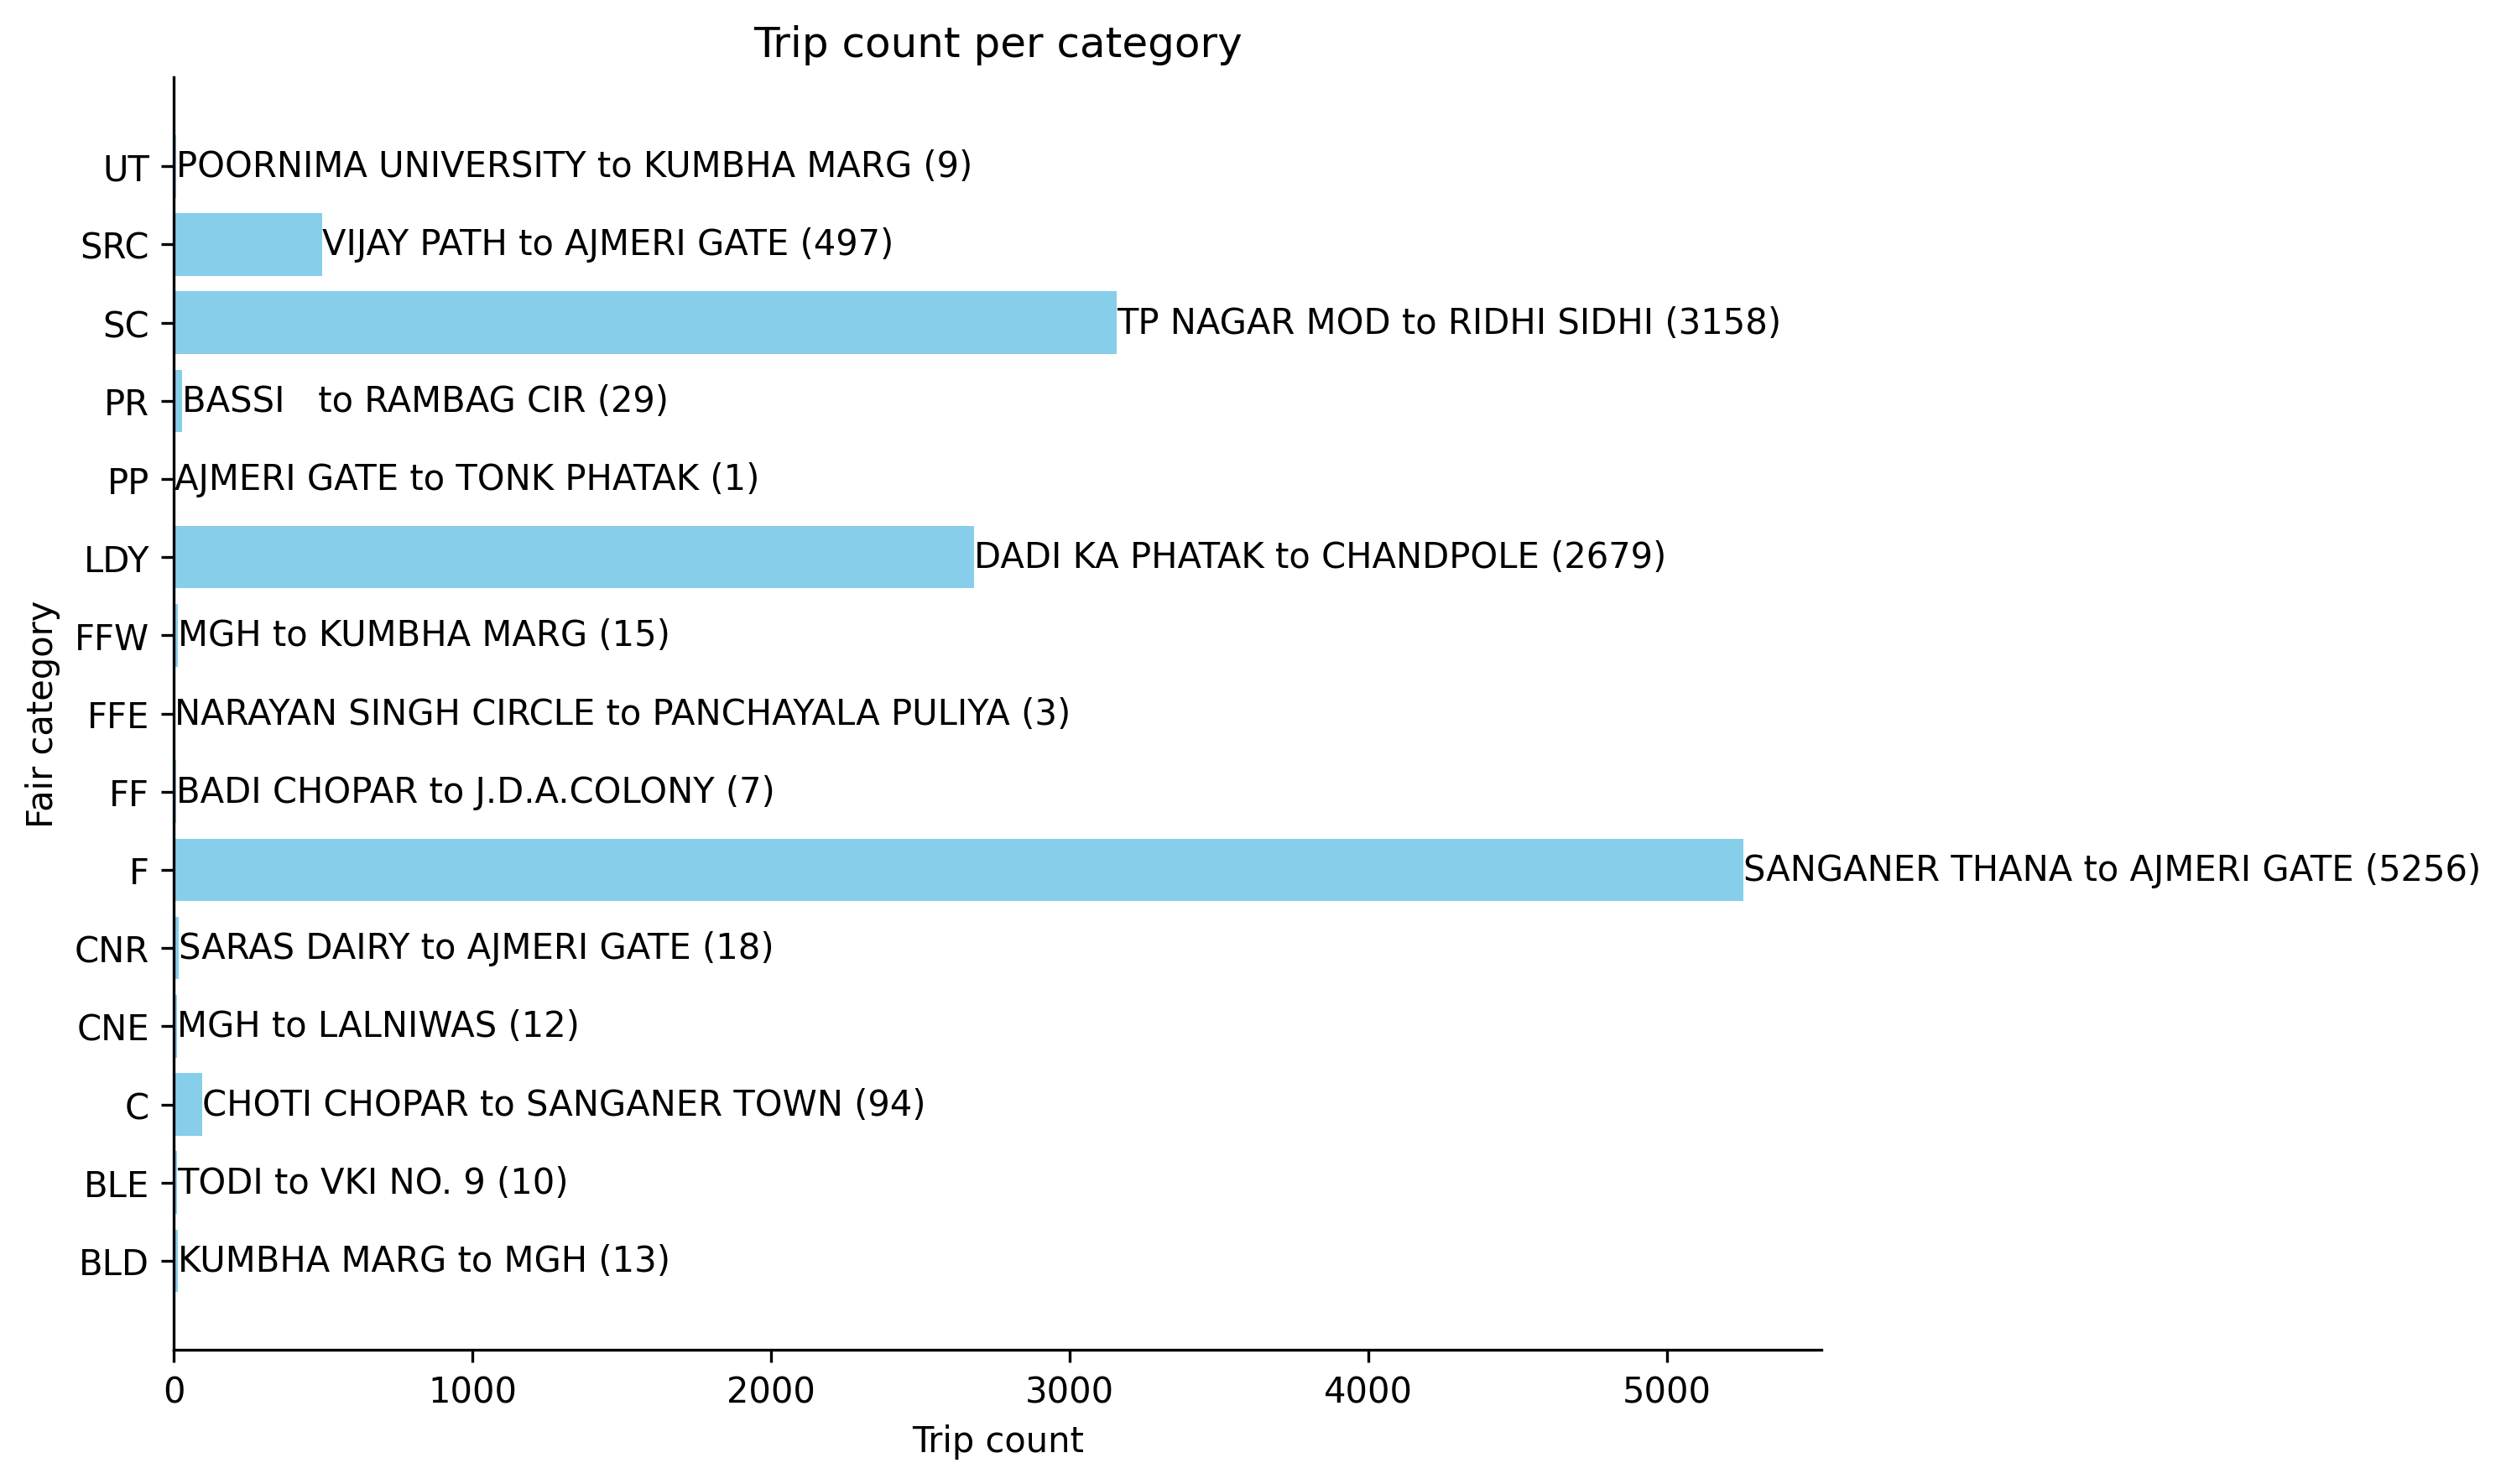

In [14]:
# Create a bar plot
plt.figure(figsize=(10, 6), dpi=300)
bars = plt.barh(most_popular_per_flag['Flag'], most_popular_per_flag['count'], color='skyblue')

for bar, trip, count in zip(bars, most_popular_per_flag['trip'], most_popular_per_flag['count']):
    width = bar.get_width()
    label_x_pos = width if width > 2 else width + 1  # Adjust this value based on your data
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{trip} ({count})', va='center')


plt.xlabel('Trip count')
plt.ylabel('Fair category')
plt.title('Trip count per category')


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.show()

SANGANER THANA, AJMERI GATE, CHANDPOLE, RIDHI SIDHI, DADI KA PHATAK

### 4.1 Count popular trips for each category on weekdays

In [15]:
# Group by 'Flag', 'From', and 'To', and count the number of trips
trip_counts = ticket_data[ticket_data['weekend']==False].groupby(['Flag', 'From stop', 'To stop']).size().reset_index(name='count')

# Sort the results within each 'Flag'
most_popular_trips = trip_counts.sort_values(['Flag', 'count'], ascending=[True, False])

# Select the top trip for each 'Flag'
most_popular_per_flag = most_popular_trips.groupby('Flag').head(1)

In [16]:
most_popular_per_flag.loc[:,'trip'] = most_popular_per_flag['From stop'] + " to " + most_popular_per_flag['To stop']

C:\Users\P70087882\AppData\Local\Temp\ipykernel_35376\3949635609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_popular_per_flag.loc[:,'trip'] = most_popular_per_flag['From stop'] + " to " + most_popular_per_flag['To stop']


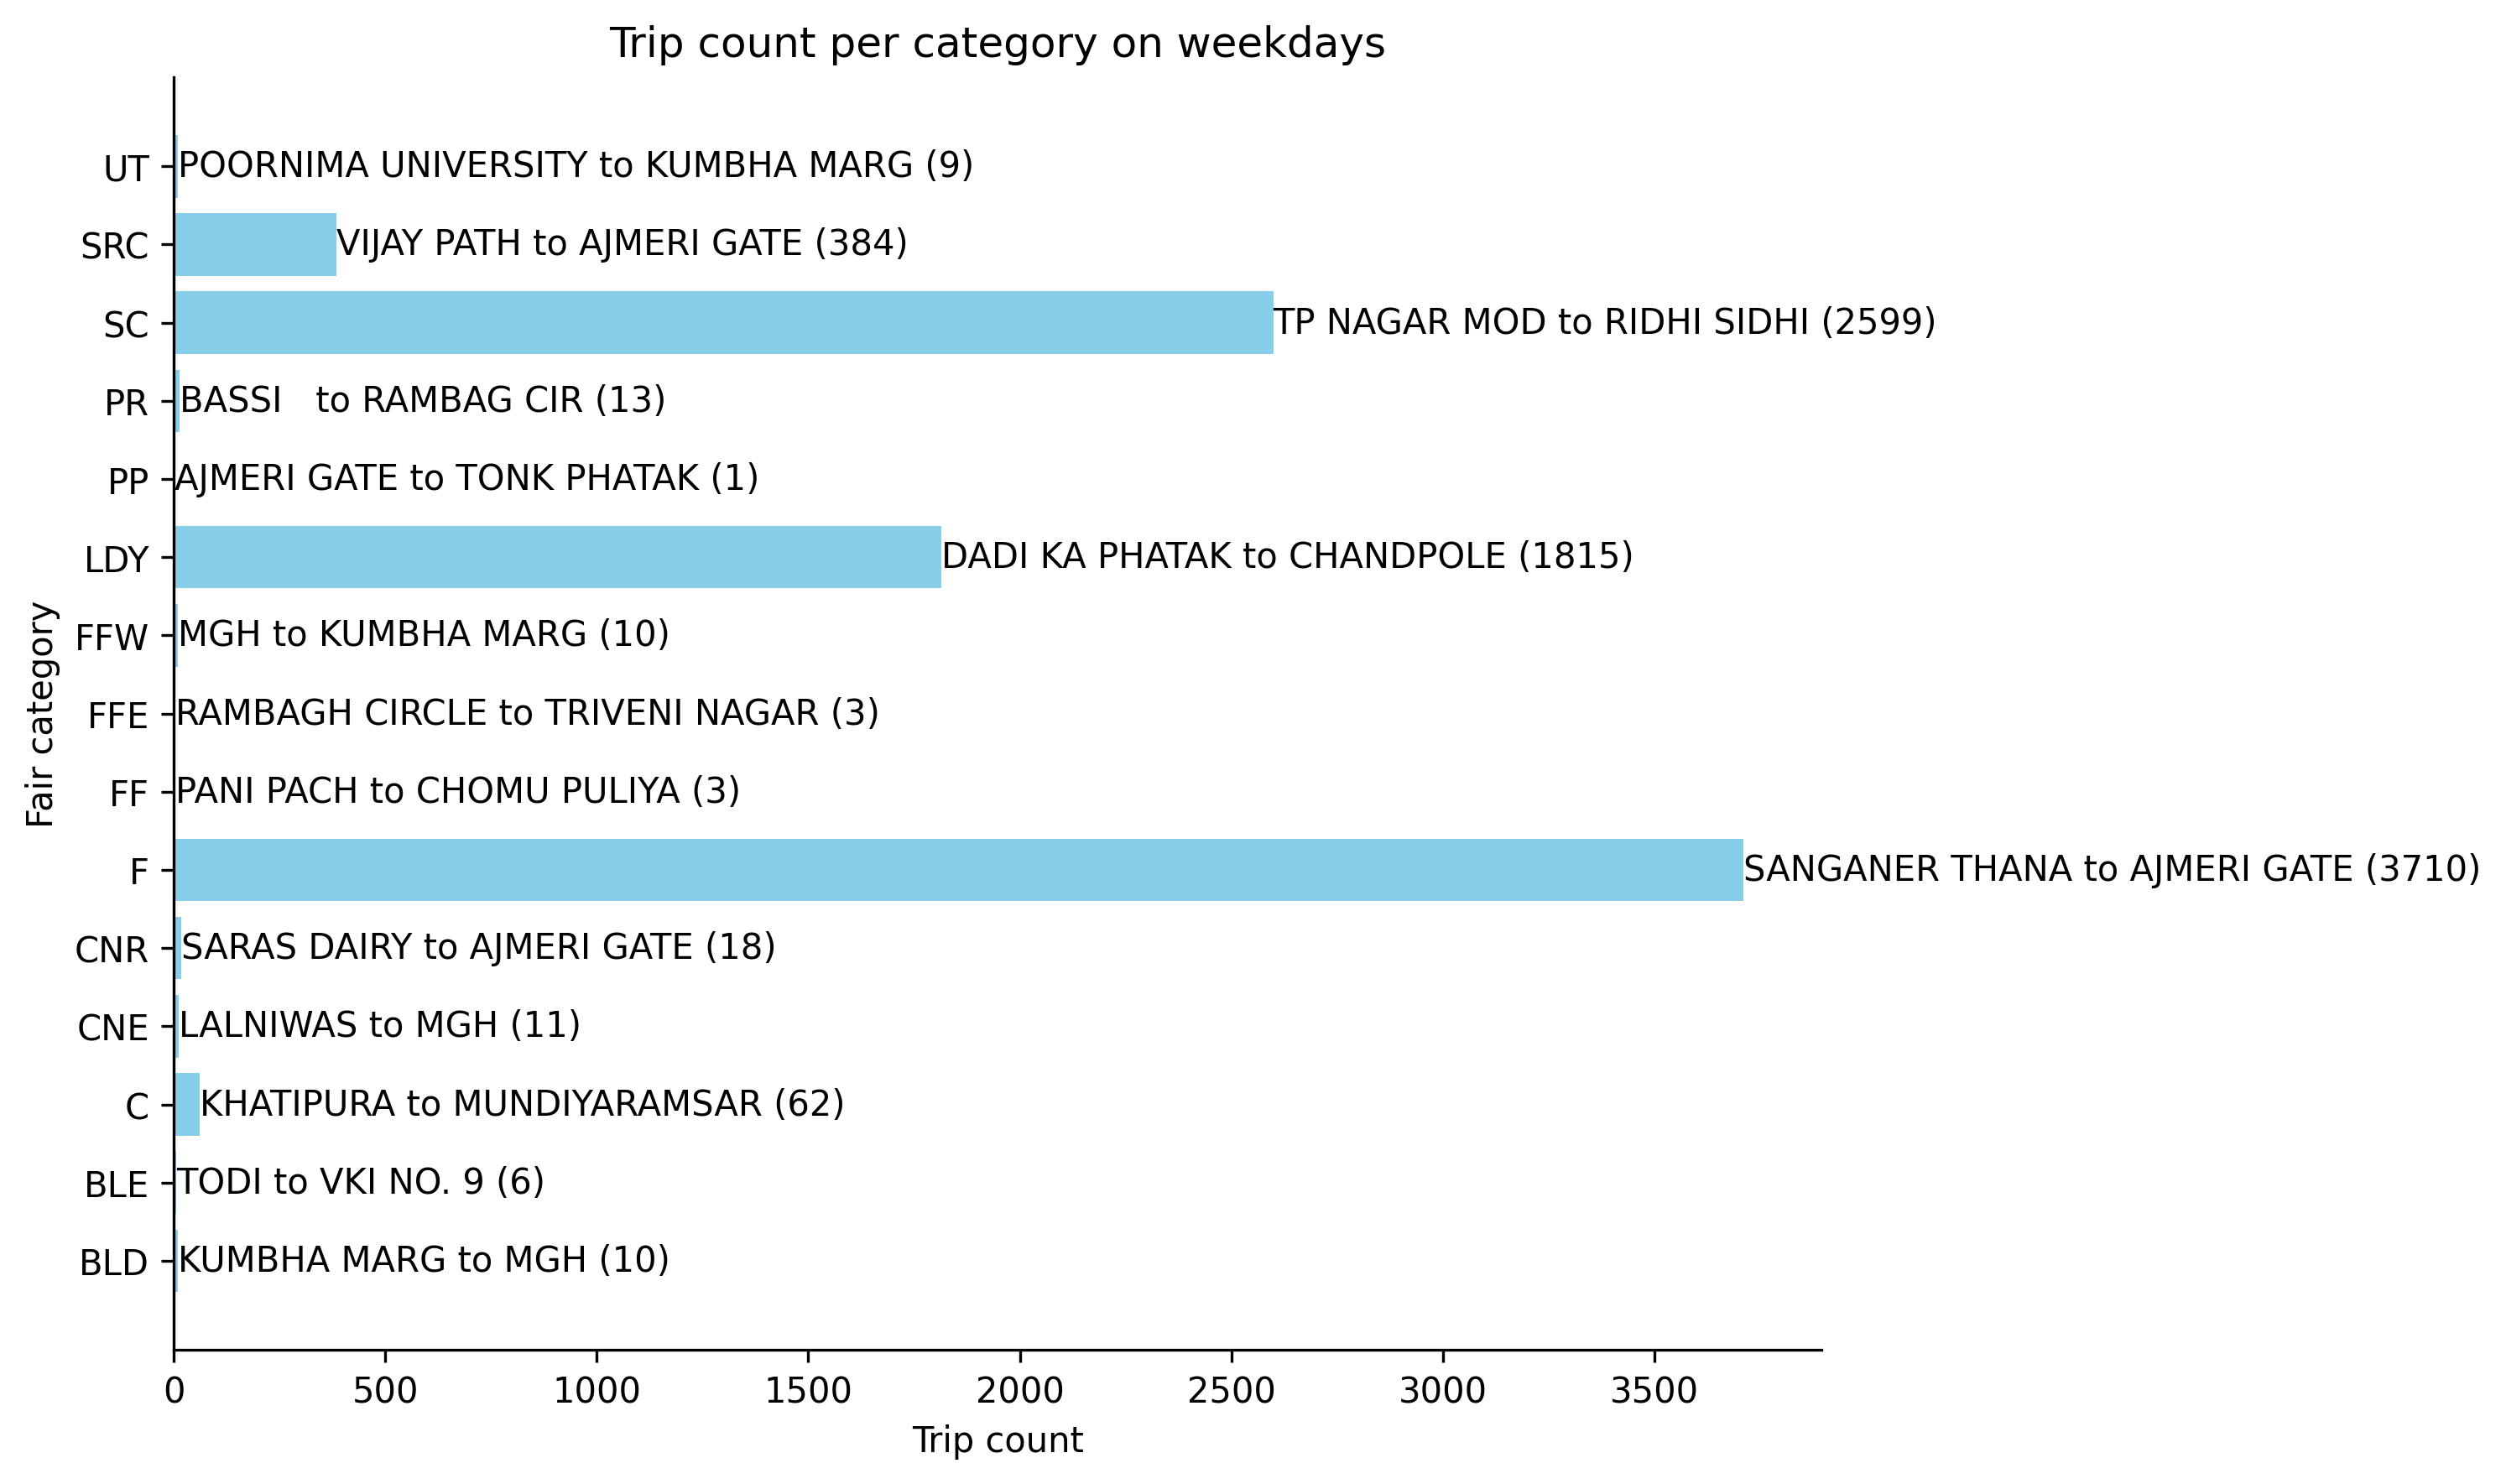

In [17]:
# Create a bar plot
plt.figure(figsize=(10, 6), dpi=300)
bars = plt.barh(most_popular_per_flag['Flag'], most_popular_per_flag['count'], color='skyblue')


for bar, trip, count in zip(bars, most_popular_per_flag['trip'], most_popular_per_flag['count']):
    width = bar.get_width()
    label_x_pos = width if width > 2 else width + 1  # Adjust this value based on your data
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{trip} ({count})', va='center')


plt.xlabel('Trip count')
plt.ylabel('Fair category')
plt.title('Trip count per category on weekdays')


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.show()

### 4.2 Count popular trips for each category on weekdays

In [18]:
# Group by 'Flag', 'From', and 'To', and count the number of trips
trip_counts = ticket_data[ticket_data['weekend']==True].groupby(['Flag', 'From stop', 'To stop']).size().reset_index(name='count')

# Sort the results within each 'Flag'
most_popular_trips = trip_counts.sort_values(['Flag', 'count'], ascending=[True, False])

# Select the top trip for each 'Flag'
most_popular_per_flag = most_popular_trips.groupby('Flag').head(1)

In [19]:
most_popular_per_flag.loc[:,'trip'] = most_popular_per_flag['From stop'] + " to " + most_popular_per_flag['To stop']

C:\Users\P70087882\AppData\Local\Temp\ipykernel_35376\3949635609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_popular_per_flag.loc[:,'trip'] = most_popular_per_flag['From stop'] + " to " + most_popular_per_flag['To stop']


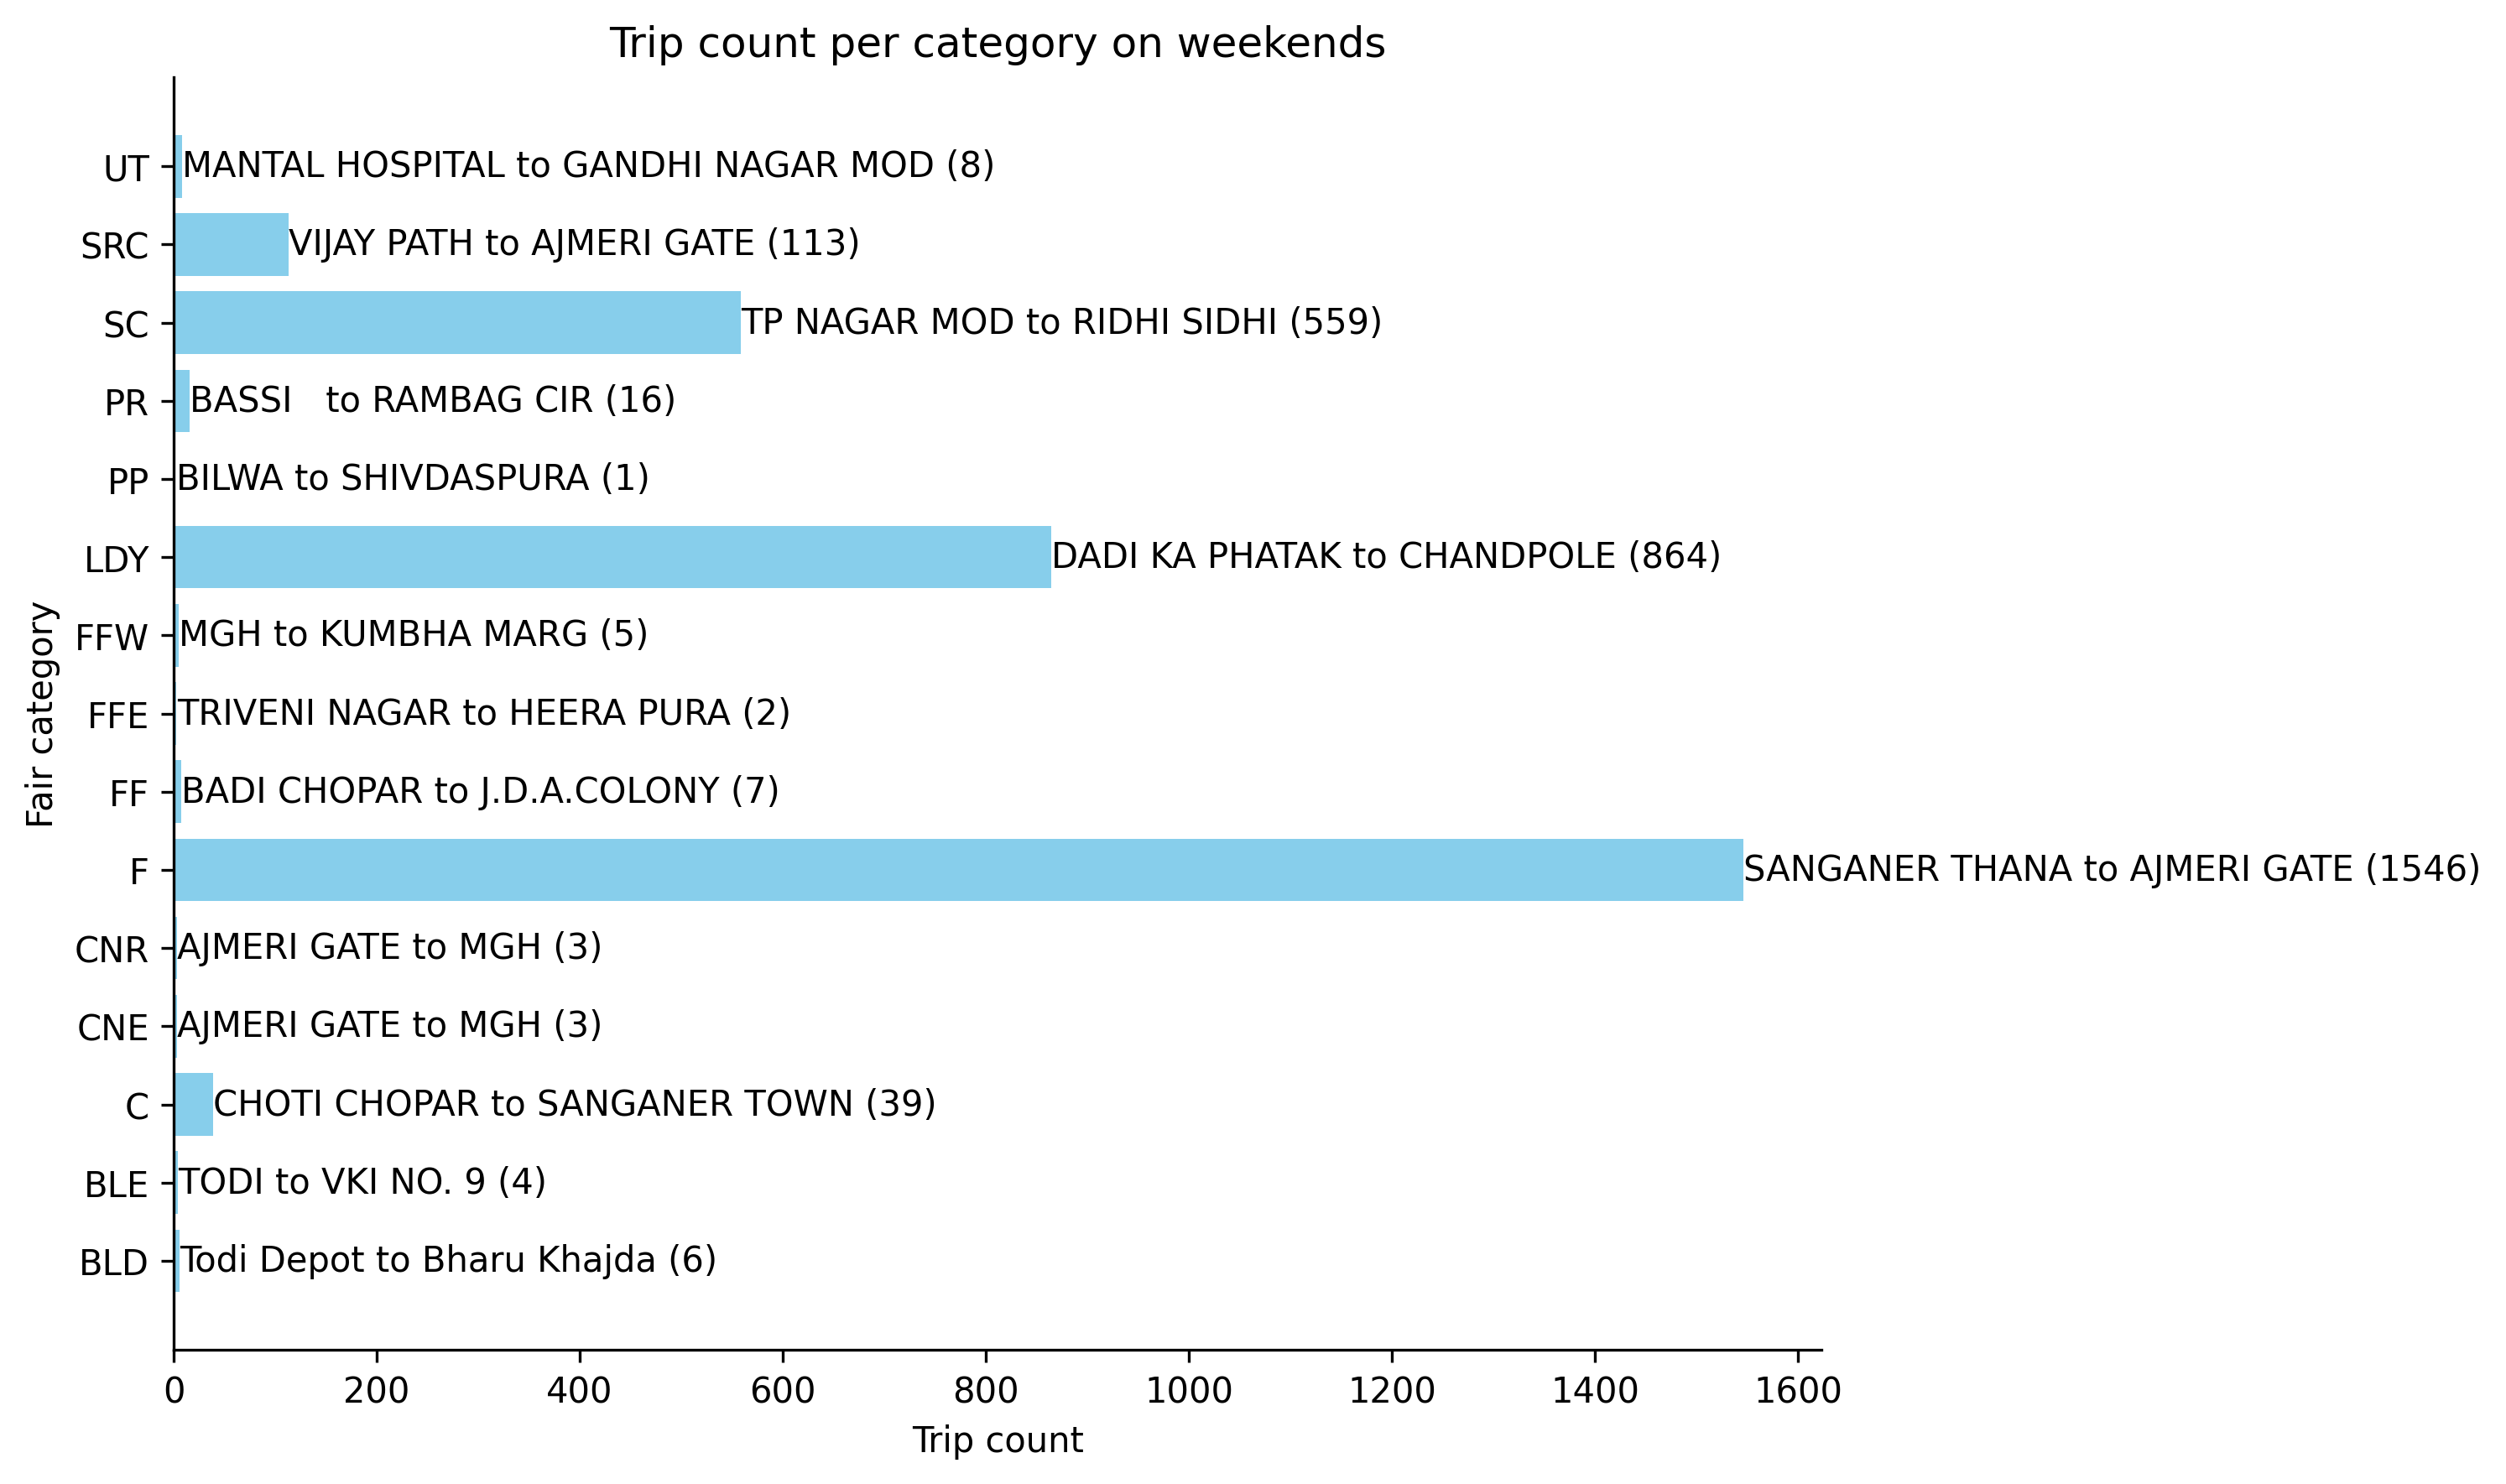

In [20]:
# Create a bar plot
plt.figure(figsize=(10, 6), dpi=300)
bars = plt.barh(most_popular_per_flag['Flag'], most_popular_per_flag['count'], color='skyblue')


for bar, trip, count in zip(bars, most_popular_per_flag['trip'], most_popular_per_flag['count']):
    width = bar.get_width()
    label_x_pos = width if width > 2 else width + 1  # Adjust this value based on your data
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{trip} ({count})', va='center')


plt.xlabel('Trip count')
plt.ylabel('Fair category')
plt.title('Trip count per category on weekends')


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.show()

## 5. Identify the busy hours

In [21]:
ticket_data['Ticket Time'] = pd.to_datetime(ticket_data['Ticket Time'], format='%H:%M:%S').dt.time
ticket_data['Hour'] = ticket_data['Ticket Time'].apply(lambda x: x.hour)

In [22]:
# Group by 'Hour' and 'Flag' to count the number of trips
hourly_counts = ticket_data.groupby(['Hour', 'Flag']).size().reset_index(name='count')
pivot_df = hourly_counts.pivot_table(index='Hour', columns='Flag', values='count', aggfunc='sum', fill_value=0)

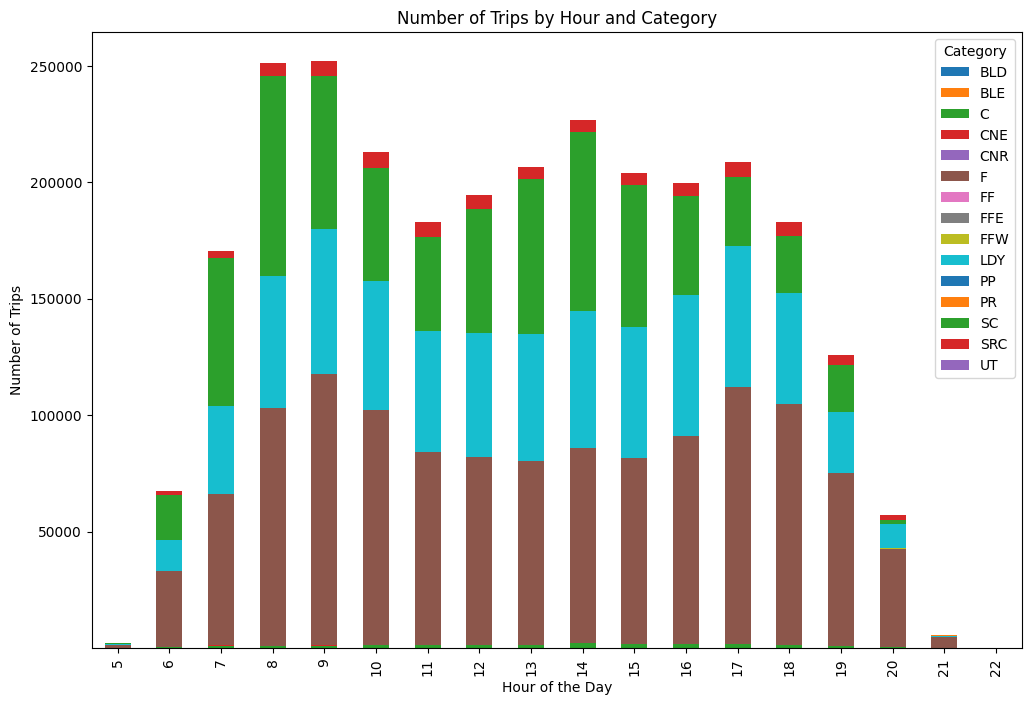

In [23]:
# Plotting
plt.figure(figsize=(12, 8))
bars = pivot_df.plot(kind='bar', stacked=True, ax=plt.gca())

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Hour and Category')
plt.legend(title='Category')

plt.show()

### 5.1 Identify busy hours on weekdays

In [24]:
hourly_counts = ticket_data[ticket_data['weekend']==False].groupby(['Hour', 'Flag']).size().reset_index(name='count')
pivot_df = hourly_counts.pivot_table(index='Hour', columns='Flag', values='count', aggfunc='sum', fill_value=0)

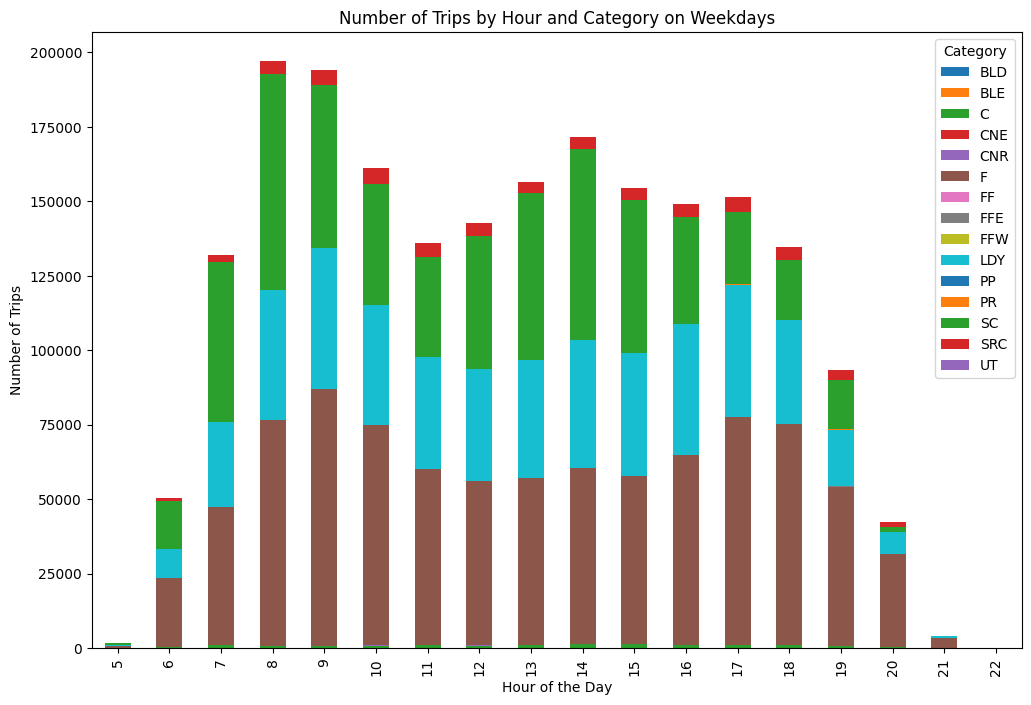

In [25]:
# Plotting
plt.figure(figsize=(12, 8))
bars = pivot_df.plot(kind='bar', stacked=True, ax=plt.gca())

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Hour and Category on Weekdays')
plt.legend(title='Category')

plt.show()

### 5.1 Identify busy hours on weekends

In [26]:
hourly_counts = ticket_data[ticket_data['weekend']==True].groupby(['Hour', 'Flag']).size().reset_index(name='count')
pivot_df = hourly_counts.pivot_table(index='Hour', columns='Flag', values='count', aggfunc='sum', fill_value=0)

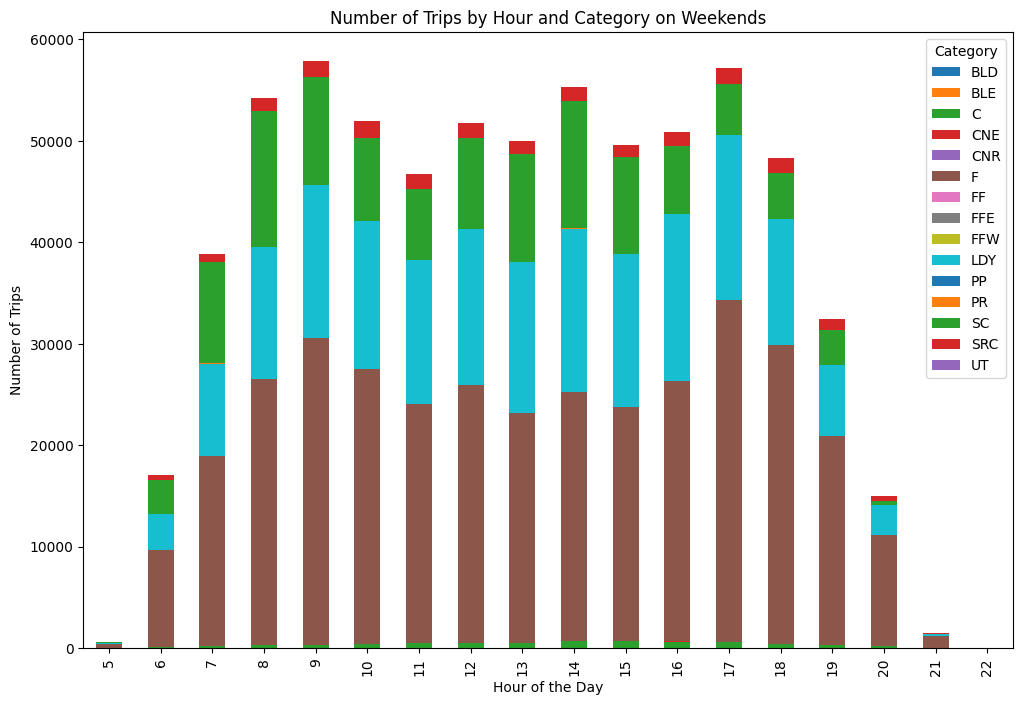

In [27]:
# Plotting
plt.figure(figsize=(12, 8))
bars = pivot_df.plot(kind='bar', stacked=True, ax=plt.gca())

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Hour and Category on Weekends')
plt.legend(title='Category')

plt.show()

## 6. Most busy stops

In [28]:
# Aggregate data by 'From stop' and 'time'
from_stop_counts = ticket_data.groupby(['From stop', 'Hour']).size().reset_index(name='count')

# Aggregate data by 'To Stop' and 'time'
to_stop_counts = ticket_data.groupby(['To stop', 'Hour']).size().reset_index(name='count')

# Combine both 'From stop' and 'To Stop' counts
combined_stops = pd.concat([from_stop_counts.rename(columns={'From stop': 'Stop'}),
                            to_stop_counts.rename(columns={'To stop': 'Stop'})])

# Aggregate again to get total counts for each stop at each time
total_stop_counts = combined_stops.groupby(['Stop', 'Hour']).sum().reset_index()

# Sum counts for each stop regardless of time
stop_total_counts = total_stop_counts.groupby('Stop')['count'].sum().sort_values(ascending=False)

In [29]:
# Identify top most busy stops
top_stops = stop_total_counts.head(5)

In [30]:
busy_times_per_stop = total_stop_counts[total_stop_counts['Stop'].isin(top_stops.index)]

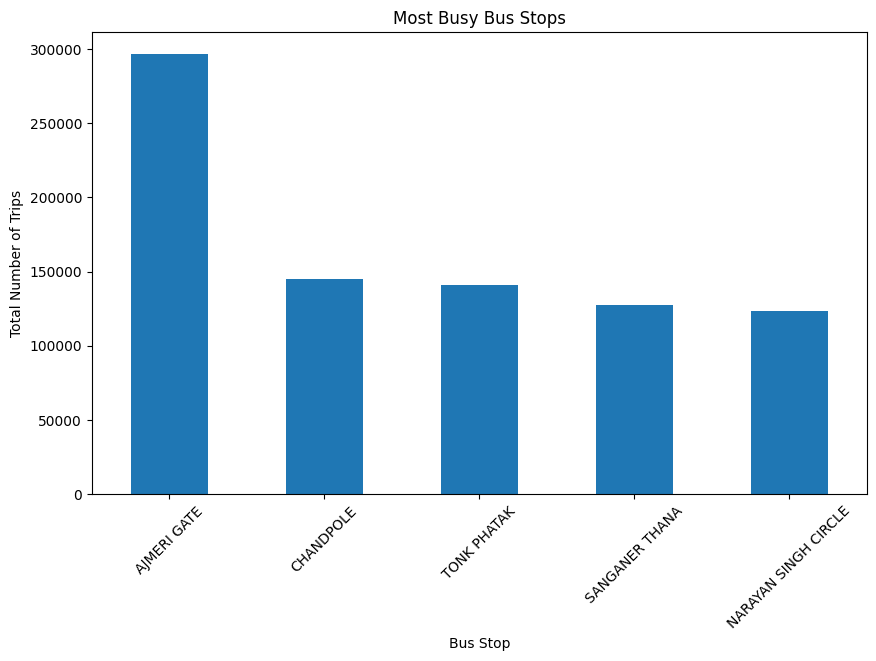

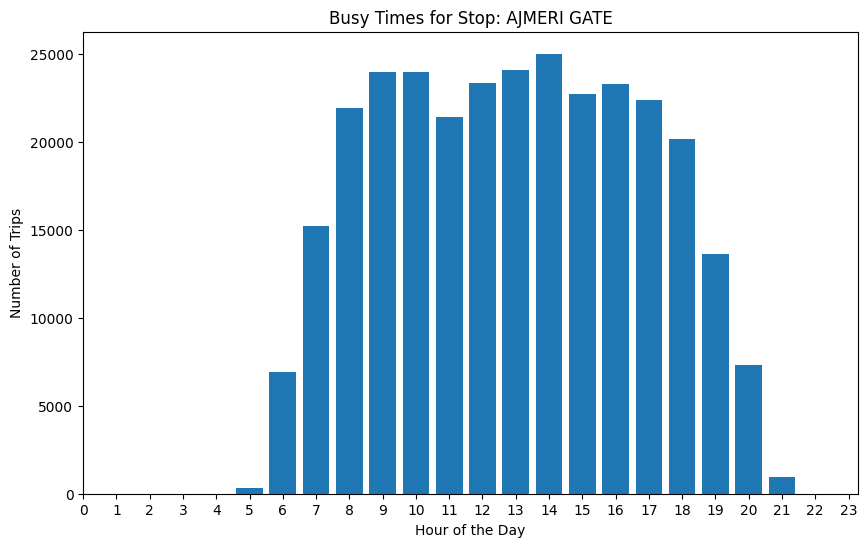

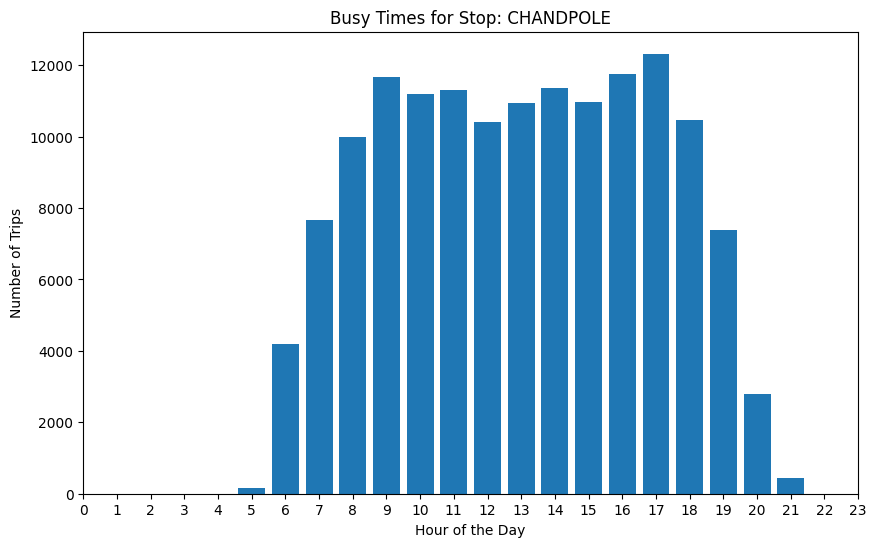

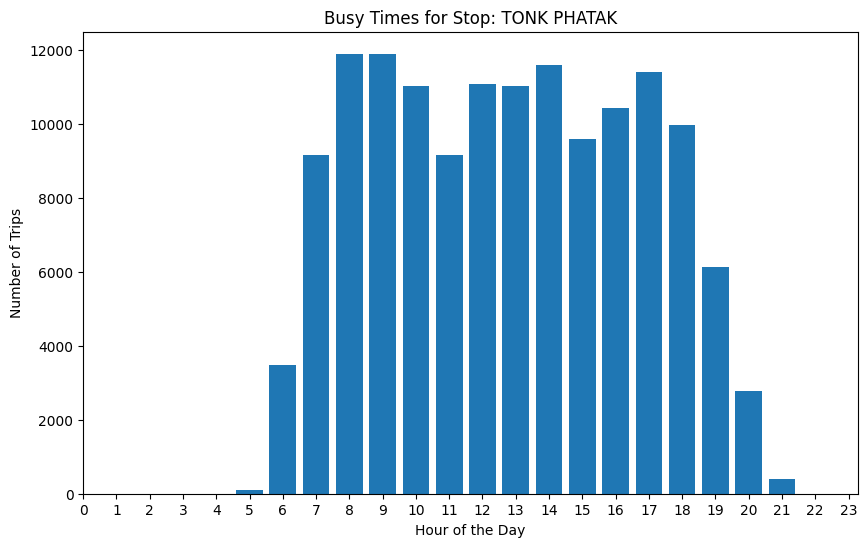

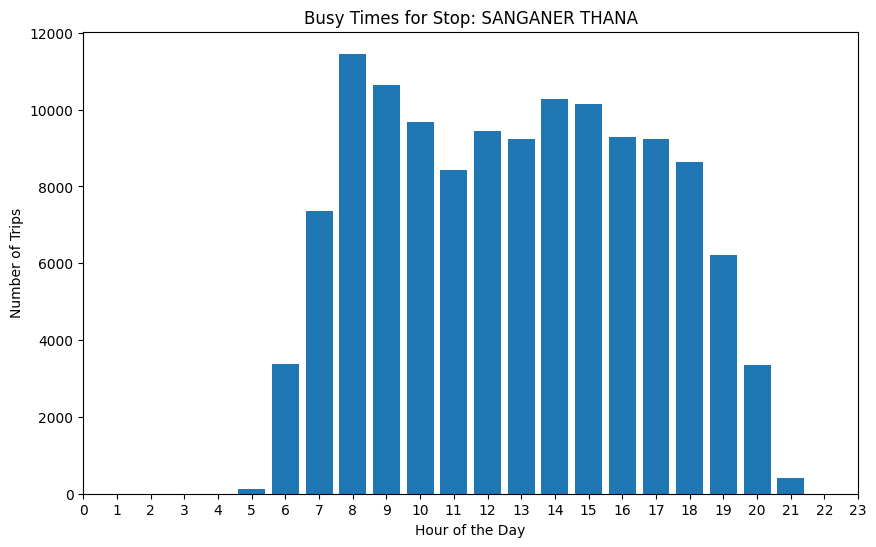

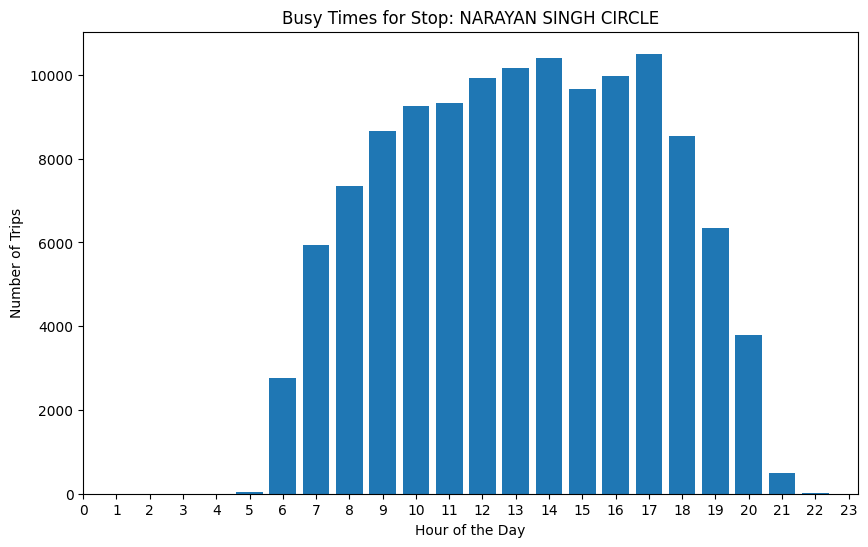

In [31]:
# Plot for most busy stops
plt.figure(figsize=(10, 6))
top_stops.plot(kind='bar')
plt.xlabel('Bus Stop')
plt.ylabel('Total Number of Trips')
plt.title('Most Busy Bus Stops')
plt.xticks(rotation=45)
plt.show()

# Plot for busy times of top stops
for stop in top_stops.index:
    plt.figure(figsize=(10, 6))
    stop_data = busy_times_per_stop[busy_times_per_stop['Stop'] == stop]
    plt.bar(stop_data['Hour'], stop_data['count'])
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Trips')
    plt.title(f'Busy Times for Stop: {stop}')
    plt.xticks(range(24))
    plt.show()


Following stops attract the highest number of daily commuters: SANGANER THANA, AJMERI GATE, CHANDPOLE, RIDHI SIDHI, DADI KA PHATAK